# Trabajo 1 - Metodo Biseccion 

## Integrantes: Patricia Cajas & Jhustyn Carvajal


In [ ]:
from sympy import * 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x, y = symbols('x y')

In [ ]:
punto_medio = lambda a,b: (a+b)/2

In [ ]:
def error_aproximado(aproxAct:int, aproxAnt:int):
  return abs((aproxAct - aproxAnt)/aproxAct) * 100

In [ ]:
def biseccion(f,a,b,t,ea):
  
  print("")
  print("{:^60}".format("Metodo de Bisección"))
  print("{:^10} {:^10} {:^10} {:^10} {:^10}".format ("i" ,"a","b","c","ea(%)"))
  
  i = 0
  while ea > t:

    i += 1
    c = punto_medio(a,b)
    ea = error_aproximado(a,b)
    evalua = f(a)*f(c)

    if evalua < 0:
      b = c
    elif evalua > 0:
      a = c
    else:
      return c

    #Valores de la Tabla 
    print("{:^10} {:^10f} {:^10f} {:^10f} {:^10}".format (i,a,b,c,round(ea,9)))
  return c

ingrese la funcion en terminos de x:x^2 - 2
ingrese el X0:1
ingrese el X1:2

                    Metodo de Bisección                     
    i          a          b          c        ea(%)   
    1       1.000000   1.500000   1.500000    100.0   
    2       1.250000   1.500000   1.250000     50.0   
    3       1.375000   1.500000   1.375000     20.0   
    4       1.375000   1.437500   1.437500  9.090909091
    5       1.406250   1.437500   1.406250  4.545454545
    6       1.406250   1.421875   1.421875  2.222222222
    7       1.414062   1.421875   1.414062  1.111111111
    8       1.414062   1.417969   1.417969  0.552486188
    9       1.414062   1.416016   1.416016  0.276243094
    10      1.414062   1.415039   1.415039  0.138121547
    11      1.414062   1.414551   1.414551  0.069060773


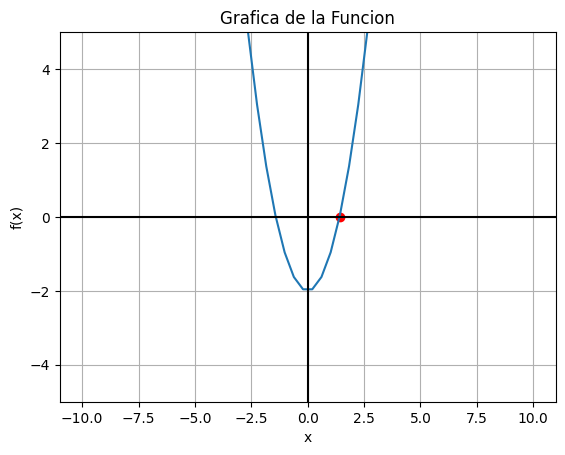

In [ ]:
#Ingreso de la Función
fs = sympify(input("ingrese la funcion en terminos de x:"))
f = lambdify(x, fs) #Transfarmamos a una expresion simbolica y que podamos evaluar

a = int(input("ingrese el X0:")) #Ingreso del limite inferior
b = int(input("ingrese el X1:")) #Ingreso del limite superior
ea = 1 #Error aproximado inicializado en 1
t = 0.1 #Tolerancia del error

if(f(a) * f(b) < 0): # Verificamos si en el intervalo esta la raiz 
  
  point = biseccion(f,a,b,t,ea)#Calculamos el aproximado de la reis con Bisección

  #Grafica de la funcion y punto
  xpts = np.linspace(-10,10) #Array de valores, para la grafica
  plt.plot(xpts, f(xpts))
  plt.title("Grafica de la Funcion")
  plt.grid(True, which='both')
  plt.scatter(point,0,c="red")
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.axvline(color="black")
  plt.axhline(color="black")
  plt.ylim([-5,5])
  plt.show()
  #-----------------------------

else: # En caso de que la raiz no esta en el intervalo dado
  
  print("Ingrese un nuevo intervalo")

  #Grafica de la funcion y punto
  xpts = np.linspace(-10,10, num=100) #Array de valores, para la grafica
  plt.plot(xpts, f(xpts))
  plt.title("Sugerencia desde la Grafica de la Funcion")
  plt.grid(True, which='both')
  plt.axvline(color="black")
  plt.axhline(color="black")
  plt.scatter(punto_medio(a,b),0,c="red")
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.ylim([-5,5])
  plt.show()
  #-----------------------------x

# Trabajo 2 - Punto Fijo

## Integrantes: Patricia Cajas & Jhustyn Carvajal

In [ ]:
from sympy import * 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x, y = symbols('x y')

In [ ]:
def error_aproximado(aproxAct:int, aproxAnt:int):
  return abs((aproxAct - aproxAnt)/aproxAct) * 100

In [ ]:
#Ingreso de la Función
fs = sympify(input("ingrese la funcion en terminos de x:"))
f = lambdify(x, fs) #Transfarmamos a una expresion simbolica y que podamos evaluar

In [ ]:
solve(exp(-x) - x) #Encontrano los ceros de la funcion 

[LambertW(1)]

In [ ]:
#Valor real de la raiz (Lo usaremos para calcular el Error Relativo Porcentual Verdadero = et)
vr = LambertW(1).evalf()
vr

0.567143290409784

 i      xn       ea(%)    et(%)
 1   1.000000   100.00    0.00    
 2   0.367879   171.83    43.29   
 3   0.692201   46.85    19.93   
 4   0.500474   38.31    12.51   
 5   0.606244   17.45    6.67    
 6   0.545396   11.16    3.91    
 7   0.579612   5.90    2.17    
 8   0.560115   3.48    1.25    
 9   0.571143   1.93    0.70    
10   0.564879   1.11    0.40    
11   0.568429   0.62    0.23    
12   0.566415   0.36    0.13    
13   0.567557   0.20    0.07    
14   0.566909   0.11    0.04    
15   0.567276   0.06    0.02    



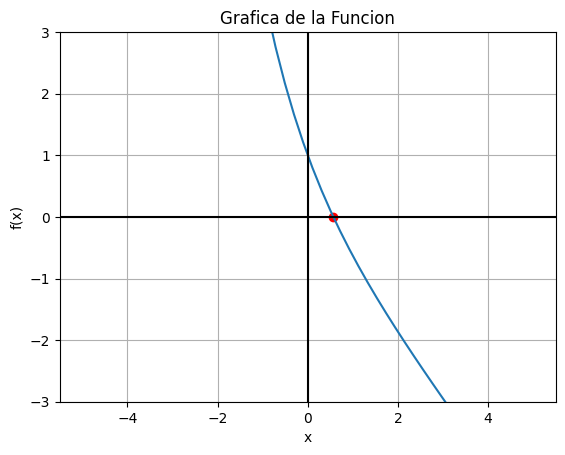


El valor de la raiz con una toleracion de 0.1 es:  0.567276  


In [ ]:
x0 = 0
tolerancia = 0.1
iteraciones = 100
f = lambdify(x,sympify("exp(-x)")) #trabajo la funcion algebraicamente 

def punto_fijo(f,x0,t,ite):
  xn = 0
  ea = 0
  erpv = 0
  print("{:^3} {:^10} {:^10} {:^5}".format("i","xn","ea(%)","et(%)"))
  for i in range(0,ite):
    xn = f(x0)
    ea = error_aproximado(xn,x0)
    if i > 0:
      if(ea < t):    
        print("{:^3.0f} {:^11f} {:^2.2f} {:^11.2f}".format(i+1,xn,ea,erpv)) #Se imprime para daber en que iteracion se cumple la tolerancia
        
        #Grafica de la funcion y punto
        print("")
        xpts = np.linspace(-5,5) #Array de valores, para la grafica
        plt.plot(xpts, lambdify(x,sympify("exp(-x) - x"))(xpts))
        plt.title("Grafica de la Funcion")
        plt.grid(True, which='both')
        plt.scatter(xn,0,c="red")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.axvline(color="black")
        plt.axhline(color="black")
        plt.ylim([-3,3])
        plt.show()
        #-----------------------------
        return xn
    print("{:^3.0f} {:^11f} {:^2.2f} {:^11.2f}".format(i+1,xn,ea,erpv))
    x0 = xn
    erpv = abs(round(vr - xn,10)*100)

  #Grafica de la funcion y punto
  print("")
  xpts = np.linspace(-5,5) #Array de valores, para la grafica
  plt.plot(xpts, lambdify(x,sympify("exp(-x) - x"))(xpts))
  plt.title("Grafica de la Funcion")
  plt.grid(True, which='both')
  plt.scatter(xn,0,c="red")
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.axvline(color="black")
  plt.axhline(color="black")
  plt.ylim([-3,3])
  plt.show()
  #-----------------------------

valorRaiz = punto_fijo(f,x0,tolerancia,100)
print("\nEl valor de la raiz con una toleracion de {} es: {:^11f}".format(tolerancia,valorRaiz))

# Trabajo 3 - Newton-Raphson

## Integrantes: Patricia Cajas & Jhustyn Carvajal

In [ ]:
from sympy import * 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x, y = symbols('x y')

In [ ]:
fs = sympify("e^-x - x")
f = lambdify(x, fs) #Transfarmamos

In [ ]:
c = solve(f(x))

In [ ]:
f = sympify("x^3 - x - 1")
df = sympify(diff(f,x))
f = lambdify(x,f)
df = lambdify(x,df)
f(x)

x**3 - x - 1

In [ ]:
iteraciones = 30
x0 = 0
xs = x0 - (f(x0)/df(x0))
xs

-1.0

In [ ]:
for i in range(0,iteraciones):
  xs = x0 - (f(x0)/df(x0))
  print(xs)
  x0 = xs

-1.0
-0.5
-3.0
-2.0384615384615383
-1.3902821472167362
-0.911611897717927
-0.34502849674816916
-1.4277507040272703
-0.9424179125094829
-0.40494935719937963
-1.7069046451828516
-1.1557563610748134
-0.6941918133295469
0.7424942987207009
2.7812959406776083
1.9827252470438306
1.5369273797582563
1.3572624831877325
1.3256630944288679
1.3247187886152572
1.3247179572453902
1.324717957244746
1.324717957244746
1.324717957244746
1.324717957244746
1.324717957244746
1.324717957244746
1.324717957244746
1.324717957244746
1.324717957244746
